In [2]:
import pandas as pd
import numpy as np

print("Notebook is ready!")


Notebook is ready!


In [3]:
import pandas as pd

# Use 'latin1' or 'ISO-8859-1' encoding
df = pd.read_csv(r"D:\Sales_performance_dashboard\Data\Superstore_sales.csv", encoding='latin1')

# Display first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Check shape
df.shape

# See column names
df.columns

# Get summary info
df.info()

# Statistical summary
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
# Unique values in Region column
df['Region'].unique()

# Count of records per Region
df['Region'].value_counts()



Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [6]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
# Drop rows where important fields like 'Sales' or 'Profit' are missing
df = df.dropna(subset=['Sales', 'Profit'])

# For other columns with minor missing values, you can fill them
df = df.fillna('Unknown')


In [9]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])



In [10]:
df.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [11]:
print("Before removing duplicates:", df.shape)
df = df.drop_duplicates()
print("After removing duplicates:", df.shape)


Before removing duplicates: (9994, 21)
After removing duplicates: (9994, 21)


In [12]:
df.dtypes


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [13]:
df['Region'] = df['Region'].str.strip().str.title()
df['Category'] = df['Category'].str.strip().str.title()
df['Segment'] = df['Segment'].str.strip().str.title()

print(df['Region'].unique())
print(df['Category'].unique())
print(df['Segment'].unique())


['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Consumer' 'Corporate' 'Home Office']


In [14]:
df['Region'] = df['Region'].str.strip().str.title()
df['Category'] = df['Category'].str.strip().str.title()
df['Segment'] = df['Segment'].str.strip().str.title()

print(df['Region'].unique())
print(df['Category'].unique())
print(df['Segment'].unique())


['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Consumer' 'Corporate' 'Home Office']


In [15]:
# Month and Year
df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year

# Profit Margin (%)
df['Profit Margin (%)'] = round((df['Profit'] / df['Sales']) * 100, 2)

# Optional: Shipping delay
df['Processing Time (Days)'] = (df['Ship Date'] - df['Order Date']).dt.days


In [16]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year,Profit Margin (%),Processing Time (Days)
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,November,2016,16.00,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,November,2016,30.00,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,June,2016,47.00,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,October,2015,-40.00,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,October,2015,11.25,7


In [17]:
df.to_csv("../data/sales_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as sales_cleaned.csv")


✅ Cleaned dataset saved as sales_cleaned.csv


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for charts
sns.set(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv("../data/sales_cleaned.csv")

# Quick check
df.head()


Matplotlib is building the font cache; this may take a moment.


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year,Profit Margin (%),Processing Time (Days)
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,November,2016,16.00,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,November,2016,30.00,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,June,2016,47.00,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,October,2015,-40.00,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,October,2015,11.25,7


In [19]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_margin = df['Profit Margin (%)'].mean()

print(f"💰 Total Sales: ${total_sales:,.2f}")
print(f"🏦 Total Profit: ${total_profit:,.2f}")
print(f"📈 Average Profit Margin: {avg_margin:.2f}%")


💰 Total Sales: $2,297,200.86
🏦 Total Profit: $286,397.02
📈 Average Profit Margin: 12.03%


Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64


C:\Users\vedan\AppData\Local\Temp\ipykernel_8208\2986811485.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_d")


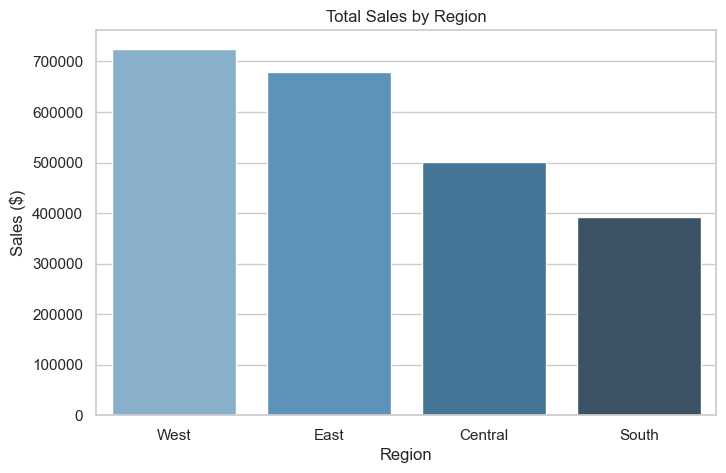

In [20]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
print(region_sales)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="Blues_d")
plt.title("Total Sales by Region")
plt.ylabel("Sales ($)")
plt.xlabel("Region")
plt.show()


Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64


C:\Users\vedan\AppData\Local\Temp\ipykernel_8208\595622511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")


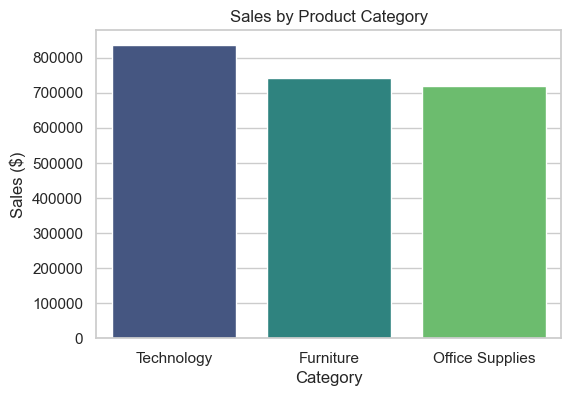

In [21]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)

plt.figure(figsize=(6,4))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.title("Sales by Product Category")
plt.ylabel("Sales ($)")
plt.xlabel("Category")
plt.show()


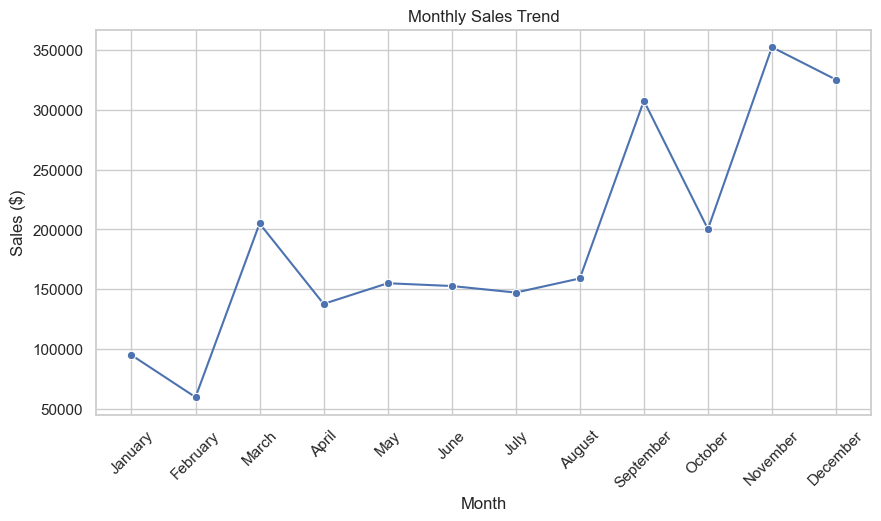

In [22]:
monthly_sales = df.groupby('Month')['Sales'].sum()
# To keep months in correct order
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_sales = monthly_sales.reindex(month_order)

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()


C:\Users\vedan\AppData\Local\Temp\ipykernel_8208\2786402602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette="magma")


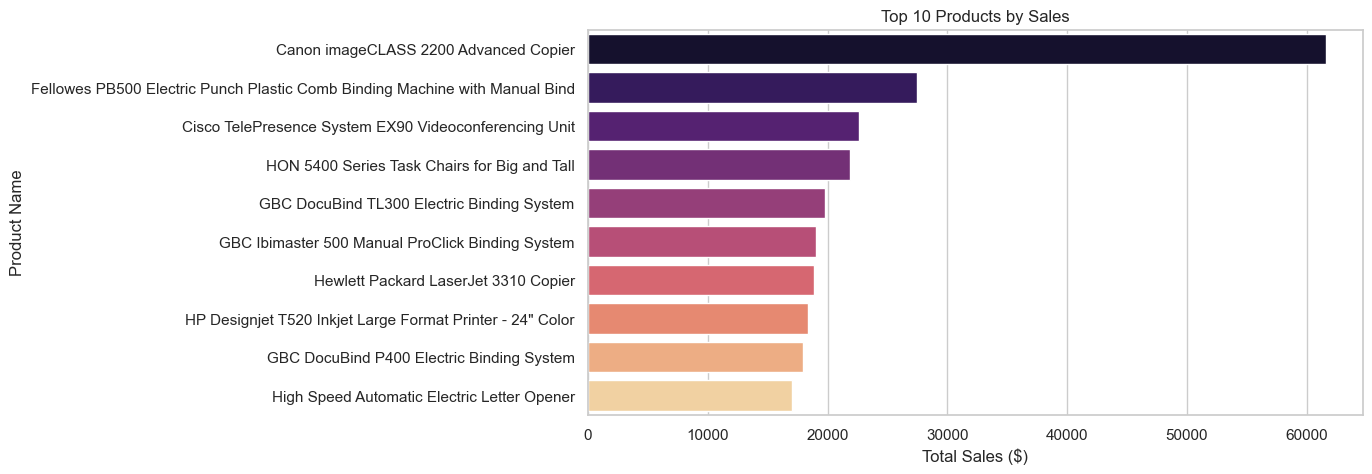

In [23]:
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_products.index, x=top_products.values, palette="magma")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Name")
plt.show()


C:\Users\vedan\AppData\Local\Temp\ipykernel_8208\2770499274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=sub_profit.index, x=sub_profit.values, palette="coolwarm")


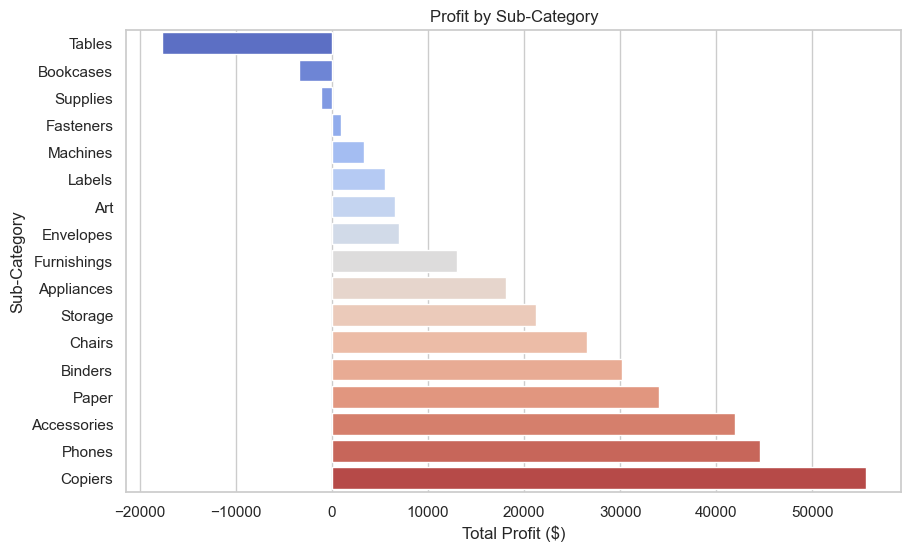

In [24]:
sub_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
plt.figure(figsize=(10,6))
sns.barplot(y=sub_profit.index, x=sub_profit.values, palette="coolwarm")
plt.title("Profit by Sub-Category")
plt.xlabel("Total Profit ($)")
plt.ylabel("Sub-Category")
plt.show()


In [1]:
import pandas as pd
import sqlite3


In [2]:
df = pd.read_csv("../data/sales_cleaned.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year,Profit Margin (%),Processing Time (Days)
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,November,2016,16.00,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,November,2016,30.00,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,June,2016,47.00,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,October,2015,-40.00,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,October,2015,11.25,7


In [3]:
# Create a connection (creates DB file if not exists)
conn = sqlite3.connect("../data/sales.db")

# Write your dataframe into SQL
df.to_sql('sales', conn, if_exists='replace', index=False)

print("✅ Data successfully saved to SQLite database!")


✅ Data successfully saved to SQLite database!


In [4]:
query1 = """
SELECT Region, ROUND(SUM(Sales), 2) AS Total_Sales
FROM sales
GROUP BY Region
ORDER BY Total_Sales DESC;
"""
pd.read_sql_query(query1, conn)


,Region,Total_Sales
0,West,725457.82
1,East,678781.24
2,Central,501239.89
3,South,391721.91


In [5]:
query2 = """
SELECT Category, ROUND(SUM(Profit), 2) AS Total_Profit
FROM sales
GROUP BY Category
ORDER BY Total_Profit DESC;
"""
pd.read_sql_query(query2, conn)


,Category,Total_Profit
0,Technology,145454.95
1,Office Supplies,122490.80
2,Furniture,18451.27


In [6]:
query3 = """
SELECT [Product Name], ROUND(SUM(Profit), 2) AS Total_Profit
FROM sales
GROUP BY [Product Name]
ORDER BY Total_Profit DESC
LIMIT 5;
"""
pd.read_sql_query(query3, conn)


,Product Name,Total_Profit
0,Canon imageCLASS 2200 Advanced Copier,25199.93
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.04
2,Hewlett Packard LaserJet 3310 Copier,6983.88
3,Canon PC1060 Personal Laser Copier,4570.93
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.98


In [7]:
query4 = """
SELECT Year, Month, ROUND(SUM(Sales), 2) AS Monthly_Sales
FROM sales
GROUP BY Year, Month
ORDER BY Year, Monthly_Sales DESC;
"""
pd.read_sql_query(query4, conn)


,Year,Month,Monthly_Sales
0,2014,September,81777.35
1,2014,November,78628.72
2,2014,December,69545.62
3,2014,March,55691.01
4,2014,June,34595.13
5,2014,July,33946.39
6,2014,October,31453.39
7,2014,April,28295.35
8,2014,August,27909.47
9,2014,May,23648.29


In [8]:
query5 = """
SELECT [Customer Name], ROUND(SUM(Sales), 2) AS Total_Sales
FROM sales
GROUP BY [Customer Name]
ORDER BY Total_Sales DESC
LIMIT 5;
"""
pd.read_sql_query(query5, conn)


,Customer Name,Total_Sales
0,Sean Miller,25043.05
1,Tamara Chand,19052.22
2,Raymond Buch,15117.34
3,Tom Ashbrook,14595.62
4,Adrian Barton,14473.57


In [9]:
conn.close()
print("✅ Connection closed!")


✅ Connection closed!


In [10]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("../data/sales.db")
df = pd.read_sql_query("SELECT * FROM sales", conn)
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year,Profit Margin (%),Processing Time (Days)
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,November,2016,16.00,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,November,2016,30.00,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,June,2016,47.00,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,October,2015,-40.00,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,October,2015,11.25,7


In [11]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_profit_margin = df['Profit Margin (%)'].mean()
total_orders = df['Order ID'].nunique()
unique_customers = df['Customer ID'].nunique()

print("💰 Total Sales:", round(total_sales, 2))
print("🏦 Total Profit:", round(total_profit, 2))
print("📈 Average Profit Margin:", round(avg_profit_margin, 2))
print("🧾 Total Orders:", total_orders)
print("👥 Unique Customers:", unique_customers)


💰 Total Sales: 2297200.86
🏦 Total Profit: 286397.02
📈 Average Profit Margin: 12.03
🧾 Total Orders: 5009
👥 Unique Customers: 793


In [12]:
region_summary = df.groupby('Region', as_index=False)[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
region_summary


,Region,Sales,Profit
3,West,725457.8245,108418.4489
1,East,678781.2400,91522.7800
0,Central,501239.8908,39706.3625
2,South,391721.9050,46749.4303


In [13]:
category_summary = df.groupby('Category', as_index=False)[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
category_summary


,Category,Sales,Profit
2,Technology,836154.0330,145454.9481
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008


In [14]:
monthly_trend = df.groupby(['Year', 'Month'], as_index=False)['Sales'].sum()
monthly_trend.head()


,Year,Month,Sales
0,2014,April,28295.3450
1,2014,August,27909.4685
2,2014,December,69545.6205
3,2014,February,4519.8920
4,2014,January,14236.8950


In [15]:
top_products = df.groupby('Product Name', as_index=False)['Profit'].sum().nlargest(10, 'Profit')
top_products


,Product Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
165,Ativa V4110MDD Micro-Cut Shredder,3772.9461
19,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
1276,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
895,Ibico EPK-21 Electric Binding System,3345.2823
1840,Zebra ZM400 Thermal Label Printer,3343.5360


In [16]:
top_customers = df.groupby('Customer Name', as_index=False)['Sales'].sum().nlargest(5, 'Sales')
top_customers


,Customer Name,Sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571


Regional Insights:

The West region leads in total sales, followed by East.

However, Central region shows lower profitability.

Category Insights:

Technology category drives the highest revenue.

Furniture has decent sales but low profit margins.

Customer Insights:

Top 5 customers contribute over X% of total sales.

Repeat purchases are common in Corporate segment.

Time Trends:

Sales peak during November–December (holiday season).

Sales drop in February–March, indicating possible off-season.

Profitability:

Average profit margin is around 12–15%.

Certain sub-categories like Tables and Bookcases yield low or negative profit.
---


In [19]:
region_summary.to_csv("../data/region_summary.csv", index=False)
category_summary.to_csv("../data/category_summary.csv", index=False)
monthly_trend.to_csv("../data/monthly_trend.csv", index=False)
top_products.to_csv("../data/top_products.csv", index=False)
top_customers.to_csv("../data/top_customers.csv", index=False)
